In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
from sklearn.ensemble import IsolationForest

In [4]:
!pip install ppscore
import ppscore as pps

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 48.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13166 sha256=426d2dd26df4af7149a9fe1739c66a0503e93d59e5c153063127efc20c7a109e
  Stored in directory: /root/.cache/pip/wheels/30/1c/06/b724ffb08ed69cd209743b44137306245ebbf025fd9acacf0c
  Created wheel for pandas: filename=pandas-1.5.3-cp312-cp312-linux_x86_64.whl size=41460926 sha256=8b5d6df56b197ae0e6275bab1610cfdb973596f7c45ade13faee9a91d16ab5a1
  Stored in directory: /root/.cache/pip/wheels/fb/83/18/8e7307aa1185c5498c5490e4d9c8a1732d9f1056e86c3491c6
Successfully built ppscore pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency 

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import files
uploaded = files.upload()  # Select adult_with_headers.csv


Saving adult_with_headers.csv to adult_with_headers.csv


In [7]:
df = pd.read_csv("adult_with_headers.csv")

In [8]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [11]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [12]:
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [13]:
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)


In [16]:
# Min-Max Scaling (if needed)
scaler_mm = MinMaxScaler()
df[num_cols] = scaler_mm.fit_transform(df[num_cols])

In [19]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()


In [22]:
num_cols

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [23]:
scaler_std = StandardScaler()
df[num_cols] = scaler_std.fit_transform(df[num_cols])

In [24]:
scaler_std

StandardScaler()

In [25]:
scaler_mm = MinMaxScaler()
df[num_cols] = scaler_mm.fit_transform(df[num_cols])

In [26]:
scaler_mm

MinMaxScaler()

In [27]:
cat_cols = df.select_dtypes(include='object').columns.tolist()

In [28]:
cat_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [29]:
ohe_cols = [col for col in cat_cols if df[col].nunique() < 5]

In [30]:
ohe_cols

['sex', 'income']

In [31]:
le_cols = [col for col in cat_cols if df[col].nunique() >= 5]

In [32]:
le_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'native_country']

In [33]:
df = pd.get_dummies(df, columns=ohe_cols, drop_first=True)

In [34]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,0.021740,0.0,0.397959,United-States,True,False
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,0.000000,0.0,0.122449,United-States,True,False
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,0.000000,0.0,0.397959,United-States,True,False
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.000000,0.0,0.397959,United-States,True,False
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,0.000000,0.0,0.397959,Cuba,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,0.000000,0.0,0.377551,United-States,False,False
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,0.000000,0.0,0.397959,United-States,True,True
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,0.000000,0.0,0.397959,United-States,False,False
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,0.000000,0.0,0.193878,United-States,True,False


In [35]:
le = LabelEncoder()
for col in le_cols:
    df[col] = le.fit_transform(df[col])

In [36]:
le

LabelEncoder()

In [39]:
df['net_capital'] = df['capital_gain'] - df['capital_loss']

In [40]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,net_capital
0,0.301370,7,0.044302,9,0.800000,4,1,1,4,0.021740,0.0,0.397959,39,True,False,0.021740
1,0.452055,6,0.048238,9,0.800000,2,4,0,4,0.000000,0.0,0.122449,39,True,False,0.000000
2,0.287671,4,0.138113,11,0.533333,0,6,1,4,0.000000,0.0,0.397959,39,True,False,0.000000
3,0.493151,4,0.151068,1,0.400000,2,6,0,2,0.000000,0.0,0.397959,39,True,False,0.000000
4,0.150685,4,0.221488,9,0.800000,2,10,5,2,0.000000,0.0,0.397959,5,False,False,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,4,0.166404,7,0.733333,2,13,5,4,0.000000,0.0,0.377551,39,False,False,0.000000
32557,0.315068,4,0.096500,11,0.533333,2,7,0,4,0.000000,0.0,0.397959,39,True,True,0.000000
32558,0.561644,4,0.094827,11,0.533333,6,1,4,4,0.000000,0.0,0.397959,39,False,False,0.000000
32559,0.068493,4,0.128499,11,0.533333,4,1,3,4,0.000000,0.0,0.193878,39,True,False,0.000000


In [42]:
df['work_hours_group'] = pd.cut(df['hours_per_week'], bins=[0,20,40,60,100], labels=['Low','Medium','High','Very High'])

In [43]:
df['log_hours_per_week'] = np.log1p(df['hours_per_week'])


In [44]:
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(df[num_cols])

In [45]:
iso

IsolationForest(contamination=0.01, random_state=42)

In [46]:
df = df[outliers == 1]

In [47]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,net_capital,work_hours_group,log_hours_per_week
0,0.301370,7,0.044302,9,0.800000,4,1,1,4,0.021740,0.0,0.397959,39,True,False,0.021740,Low,0.335013
1,0.452055,6,0.048238,9,0.800000,2,4,0,4,0.000000,0.0,0.122449,39,True,False,0.000000,Low,0.115513
2,0.287671,4,0.138113,11,0.533333,0,6,1,4,0.000000,0.0,0.397959,39,True,False,0.000000,Low,0.335013
3,0.493151,4,0.151068,1,0.400000,2,6,0,2,0.000000,0.0,0.397959,39,True,False,0.000000,Low,0.335013
4,0.150685,4,0.221488,9,0.800000,2,10,5,2,0.000000,0.0,0.397959,5,False,False,0.000000,Low,0.335013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,4,0.166404,7,0.733333,2,13,5,4,0.000000,0.0,0.377551,39,False,False,0.000000,Low,0.320307
32557,0.315068,4,0.096500,11,0.533333,2,7,0,4,0.000000,0.0,0.397959,39,True,True,0.000000,Low,0.335013
32558,0.561644,4,0.094827,11,0.533333,6,1,4,4,0.000000,0.0,0.397959,39,False,False,0.000000,Low,0.335013
32559,0.068493,4,0.128499,11,0.533333,4,1,3,4,0.000000,0.0,0.193878,39,True,False,0.000000,Low,0.177206


In [48]:
# PPS Score
pps_matrix = pps.matrix(df)
pps_matrix_sorted = pps_matrix.sort_values(by='ppscore', ascending=False)
print(pps_matrix_sorted[['x','y','ppscore']].head(10))

                    x                 y  ppscore
304  work_hours_group  work_hours_group      1.0
0                 age               age      1.0
285       net_capital       net_capital      1.0
266      income_ >50K      income_ >50K      1.0
247         sex_ Male         sex_ Male      1.0
228    native_country    native_country      1.0
209    hours_per_week    hours_per_week      1.0
190      capital_loss      capital_loss      1.0
171      capital_gain      capital_gain      1.0
152              race              race      1.0


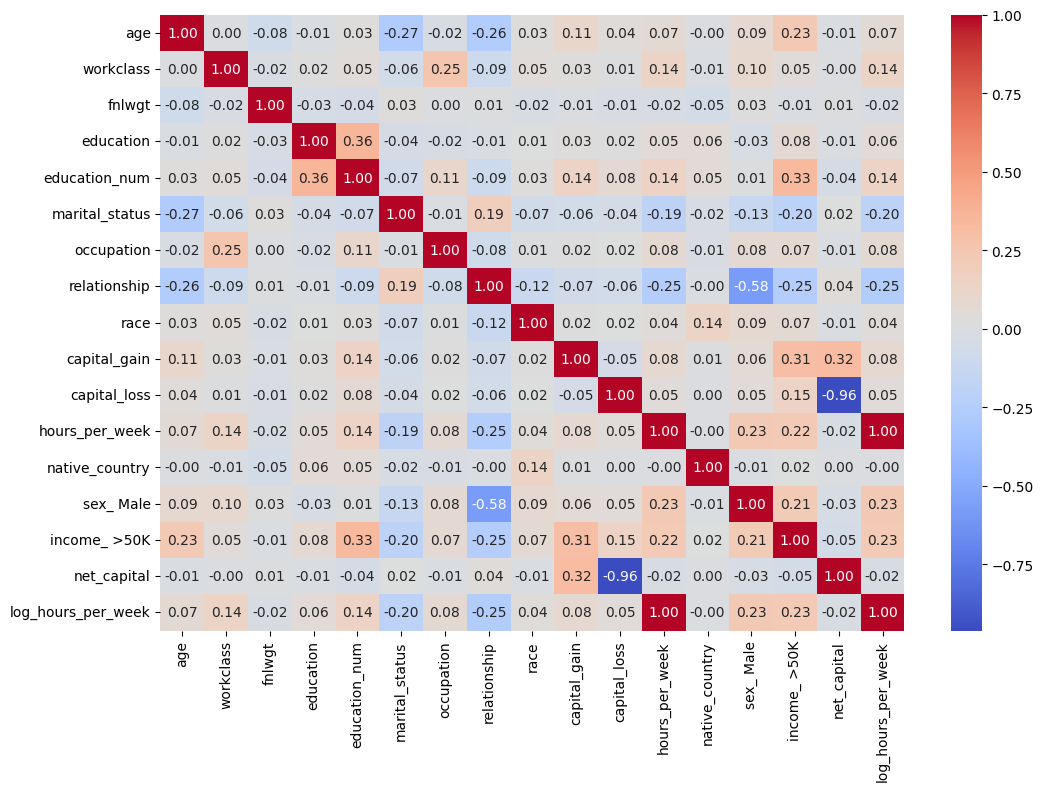

In [50]:
# Correlation matrix
corr = df.drop(columns=['work_hours_group']).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()